# **Ievads attēlu apstrādē**
## **Praktiskais darbs Nr. 1**
---

**Students:** Dmitrijs Važeņins  

**Studenta apliecības Nr.:** 241RDB200

**Saite uz programmēšanas kodu:** https://colab.research.google.com/drive/1gItbNmVaJOLB7UqY_CGSqE2cW4jD3W8x?usp=sharing

---


## **Programmas kods ar izvadi**
*Darbā jābūt iekļautam palaistam Python kodam, t. i., kodam jābūt izpildītam tā, lai dokumentā būtu redzamas visas vizualizācijas, attēli, grafiki un cita programmas izvade. Nepalaists kods vai kods bez redzamiem rezultātiem netiks uzskatīts par korekti iesniegtu. Kodam jābūt bez komentāriem.*

Saving 1.jpg to 1 (5).jpg
Saving 2.jpg to 2 (4).jpg


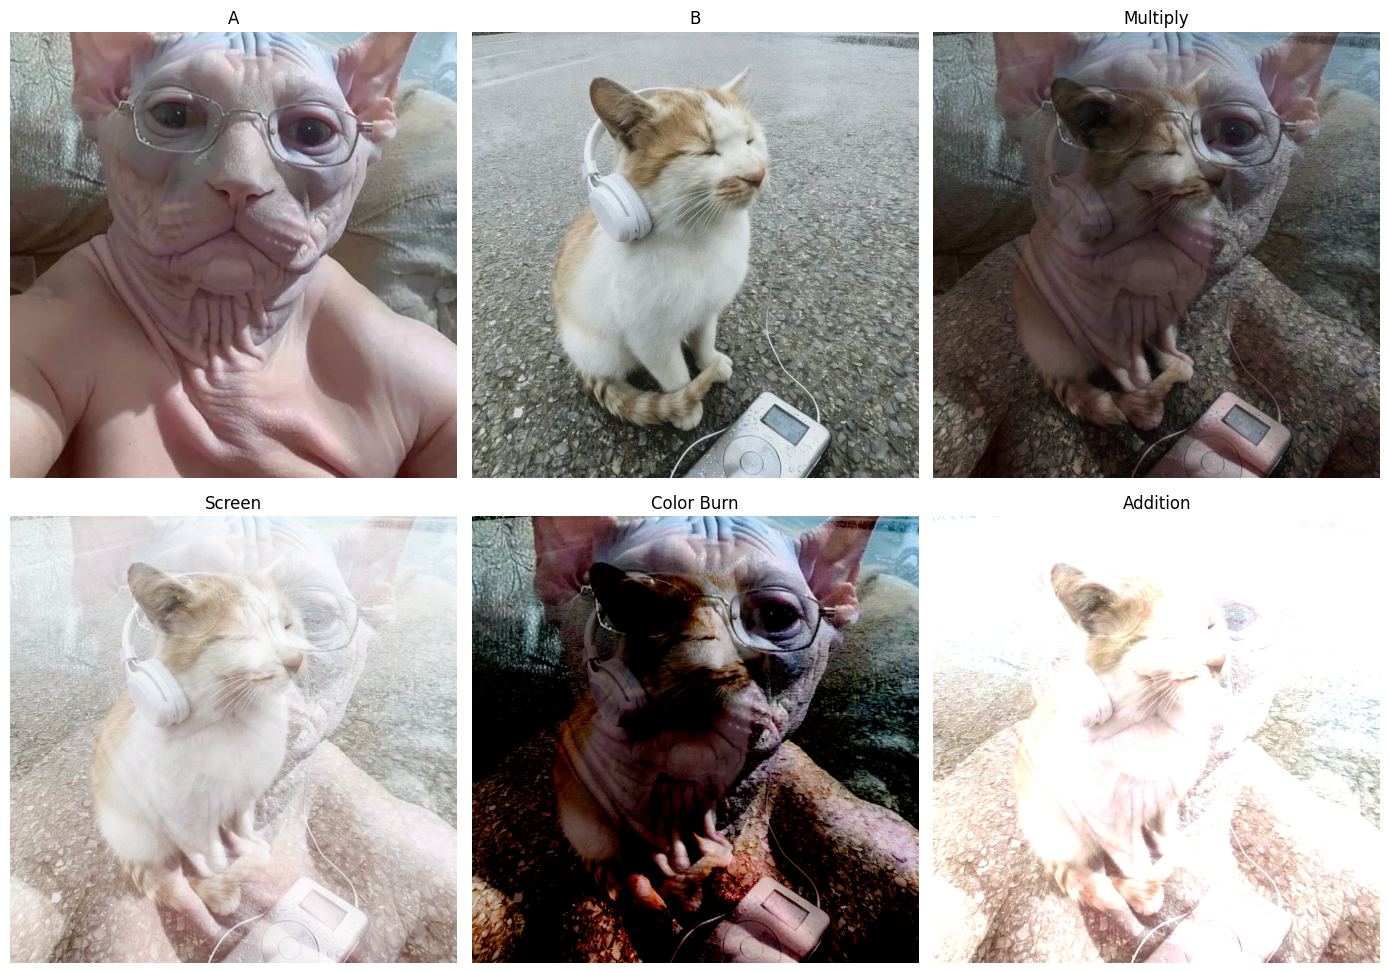

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
paths = list(uploaded.keys())

img_a = Image.open(paths[0]).convert("RGB")
img_b = Image.open(paths[1]).convert("RGB")

def center_crop_to_square(img):
    w, h = img.size
    s = min(w, h)
    left = (w - s) // 2
    top = (h - s) // 2
    return img.crop((left, top, left + s, top + s))

img_a = center_crop_to_square(img_a)
img_b = center_crop_to_square(img_b)

S = min(img_a.size[0], img_b.size[0])
img_a = img_a.resize((S, S), Image.Resampling.LANCZOS)
img_b = img_b.resize((S, S), Image.Resampling.LANCZOS)

A = np.asarray(img_a).astype(np.float32) / 255.0
B = np.asarray(img_b).astype(np.float32) / 255.0

def to_u8(x):
    return (np.clip(x, 0.0, 1.0) * 255.0 + 0.5).astype(np.uint8)

def blend_multiply(base, blend):
    return base * blend

def blend_screen(base, blend):
    return 1.0 - (1.0 - base) * (1.0 - blend)

def blend_color_burn(base, blend, eps=1e-6):
    return 1.0 - (1.0 - base) / np.maximum(blend, eps)

def blend_addition(base, blend):
    return base + blend

C_mul = blend_multiply(A, B)
C_scr = blend_screen(A, B)
C_burn = blend_color_burn(A, B)
C_add = np.clip(blend_addition(A, B), 0.0, 1.0)

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(2,3,1); ax.imshow(to_u8(A)); ax.set_title("A"); ax.axis("off")
ax = fig.add_subplot(2,3,2); ax.imshow(to_u8(B)); ax.set_title("B"); ax.axis("off")
ax = fig.add_subplot(2,3,3); ax.imshow(to_u8(C_mul)); ax.set_title("Multiply"); ax.axis("off")
ax = fig.add_subplot(2,3,4); ax.imshow(to_u8(C_scr)); ax.set_title("Screen"); ax.axis("off")
ax = fig.add_subplot(2,3,5); ax.imshow(to_u8(C_burn)); ax.set_title("Color Burn"); ax.axis("off")
ax = fig.add_subplot(2,3,6); ax.imshow(to_u8(C_add)); ax.set_title("Addition"); ax.axis("off")
plt.tight_layout()
plt.show()

# **Secinājumi**

*Satur sakarīgus un pamatotus secinājumus par izveidotu darbu un eksperimentiem. Var vadīties pēc uzdevumā dotām vadlīnijām.
Secinājumus jāraksta patstāvīgi, MI rīku pielietošana nav pieņemama.*

Pirmkārt, es domāju, ka visu šo attēlu pārklāšanas režīmu realizēšanai nepieciešamais kods būs lielāks, bet sanāca samērā īsi. Lai rezultāti izskatītos skaidrāk, papildus tika implementēta kolāža, bet vispirms izvēlētie attēli tika sagriezti līdz kvadrātiem, lai tajā viss bija vienmērīgi izvietots.
Grūtības bija tikai no tehniskās puses: pirmo reizi lietoju Google Colab un līdz šim neesmu lietojis NumPy bibliotēku tādā veidā. Pagaidām visas funkcijas ir saprotamas un visas formulas ar skaidrojumiem ir atrodamas prezentācijās, tomēr jaunas sintakses lietošana bija mazliet grūta.
Pildot šo darbu, es redzēju, ka attēli tiešām ir skaitļu matricas un to modificēšanai un citām darbībām var lietot matemātiskās formulas, kur katra pikseļa vērtība ietekmē galīgo rezultātu. Skatoties uz rezultējošajiem attēliem, ir skaidrs, ka attēlu pārklēšanas režīmiem ir arī vizuālā ietekme: screen padara gaišāku, color burn palielina kontrastu, addition izdedzina attēlu, padarot to parāk gaišu.

##*Papildus kods formatēta HTML faila iegūšanai*
Ar šo koda daļu ir iespējams saglabāt Colab Notebook kā HTML, kuru pēc tam var "izdrukāt" kā PDF, kopā ar visām izvadēm. Šī pieeja nodrošina labāku programmas koda un izvades attēlu renderēšanu, nekā mēgīnājumi to drukāt pa taisno no pārlūka.

In [ ]:
#Šo var palaist tad, ja Google Colab sūdzās, ka nav pieinstālēts nbconvert. Bet parasti tas NAV nepieciešams
!pip install nbconvert

In [ ]:
#Šis ir nepieciešams, lai dotu Google Colab pieeju diskam, kurā glabājās notebook fails, lai to pārkonvertētu uz HTML
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Šeit norādiet ceļu pie Jūsu Colab notebook faila, kur tieši tas atrodas var pābaudīt Google Drive. Ja šo veidni saglabājāt ar "Save a copy to Drive", tā visticamāk atrodas Colab Notebooks mapē.
!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/Praktiskais darbs 1.ipynb" \
  --to html \
  --embed-images

In [ ]:
#Notiek HTML faila lejuplāde
from google.colab import files
files.download("/content/drive/MyDrive/Colab Notebooks/Praktiskais darbs 1.html")

Tālāk atverot lejuplādēto HTML failu pārlūkā, to var izdrukāt kā PDF (Save to PDF).